### Identifying the clusters from the data


I am applying a clustering algorithm for a supervised data (having target column) to check how effectively the algorithm is able to provide the cluster classification.

In [6]:
import pandas as pd

data = pd.read_csv(r'C:\Users\Bharath Setty\Desktop\Sriraksha\Data Science\2. Careerera  - DS Course\Datasets - for EDA - class given\seeds - Sheet1.csv')

data.head()


,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [7]:
# features : area, perimeter, compactness, kernel_length, kernel_width, asymmetry_coefficient
# target : species
# not required : groove_length 

In [8]:
features = data[data.columns[0:6]]       

In [9]:
features.shape

# the output shows that the data contains 210 rows & 6 columns

(210, 6)

Missing Values

In [10]:
data.isnull().values.any()

False

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA   

In [12]:
scaled_features = MinMaxScaler().fit_transform(features)

In [13]:
scaled_features

array([[0.44098206, 0.50206612, 0.5707804 , 0.48648649, 0.48610121,
        0.18930164],
       [0.40509915, 0.44628099, 0.66243194, 0.36880631, 0.50106914,
        0.03288302],
       [0.34938621, 0.34710744, 0.87931034, 0.22072072, 0.50392017,
        0.25145302],
       ...,
       [0.24645892, 0.25826446, 0.7277677 , 0.18975225, 0.42908054,
        0.98166664],
       [0.11803588, 0.16528926, 0.39927405, 0.15540541, 0.14682823,
        0.36834441],
       [0.16147309, 0.19214876, 0.54718693, 0.19369369, 0.24518888,
        0.63346292]])

### PCA 


In [14]:

pca = PCA(n_components=2).fit(scaled_features)   
features_2d = pca.transform(scaled_features)      

In [15]:
scaled_features[:3]

array([[0.44098206, 0.50206612, 0.5707804 , 0.48648649, 0.48610121,
        0.18930164],
       [0.40509915, 0.44628099, 0.66243194, 0.36880631, 0.50106914,
        0.03288302],
       [0.34938621, 0.34710744, 0.87931034, 0.22072072, 0.50392017,
        0.25145302]])

In [16]:
features_2d[0:10]


array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705],
       [-0.06582089, -0.36365235],
       [ 0.32594892, -0.37695797],
       [-0.02455447, -0.31060184],
       [-0.00769646, -0.07594931],
       [-0.05646955, -0.26696284],
       [ 0.38196305, -0.05149471],
       [ 0.35701044, -0.17697998]])

Now that we have the data points translated to 2-dimensional scaled data from 6-dimensional scaled data, lets visualize them in a plot:

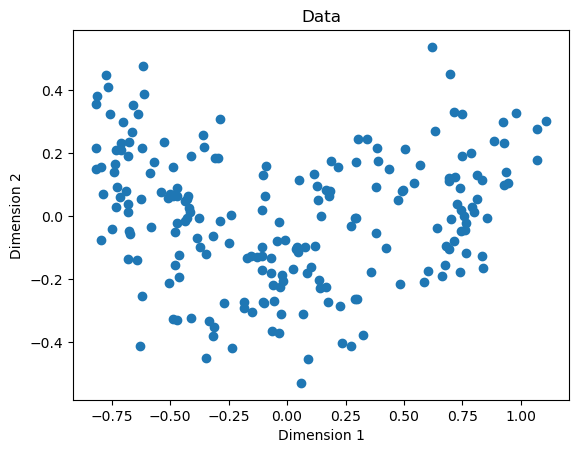

In [18]:
# Visualising the scaled 6 dimensional data as a 2 dimensional data 

import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()
plt.close()


In [19]:
# Finding optimal value of 'k'

In [20]:

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans       


In [21]:

wcss = []                                    
for i in range(1, 11):                       
    kmeans = KMeans(n_clusters = i)          
    
    kmeans.fit(features_2d)                  
    
    wcss.append(kmeans.inertia_)             

In [22]:
wcss

[70.44205396430714,
 24.794453705743422,
 12.806151222173153,
 10.154036718792726,
 8.18104140495187,
 6.923062419422528,
 5.755558180936941,
 4.978268168911008,
 4.3117210076122525,
 3.7984650364854304]

### WCSS Plot / Elbow Method
(popular method)

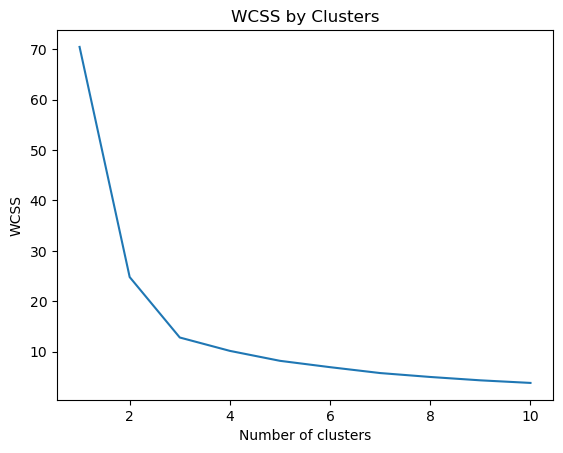

In [23]:

plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### The value after which our WCSS gets saturated - is the optmial value of 'k'


The plot shows a large reduction in WCSS (so greater *tightness*) as the number of clusters increases from one to two, and a further noticable reduction from two to three clusters. After that, the reduction is less pronounced, resulting in an "elbow" in the chart at around three clusters. This is a good indication that there are two to three reasonably well separated clusters of data points.

### K-Means Clustering

Let's try using K-Means on our seeds data with a K value of 3.

In [24]:

from sklearn.cluster import KMeans                           

# Create a model based on 3 centroids
model = KMeans(n_clusters=3, n_init=100, max_iter=1000)          

# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(features_2d)                                      

# View the cluster assignments
km_clusters


array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2])

Let's see those cluster assignments with the two-dimensional data points.

In [26]:

def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

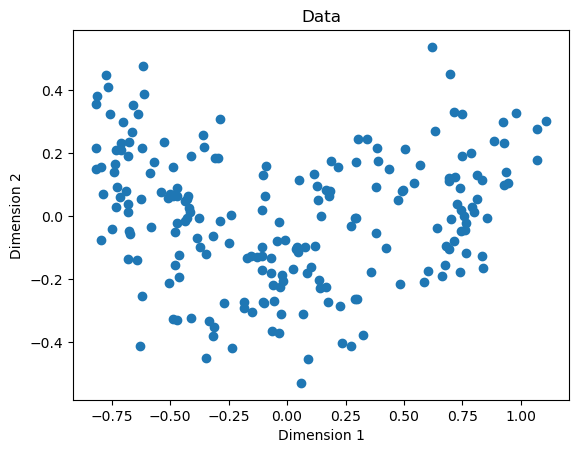

In [27]:
# actual data

plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()
plt.savefig('pca.jpg', dpi=100)
plt.close()

In [28]:
features_2d[:3]

array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705]])

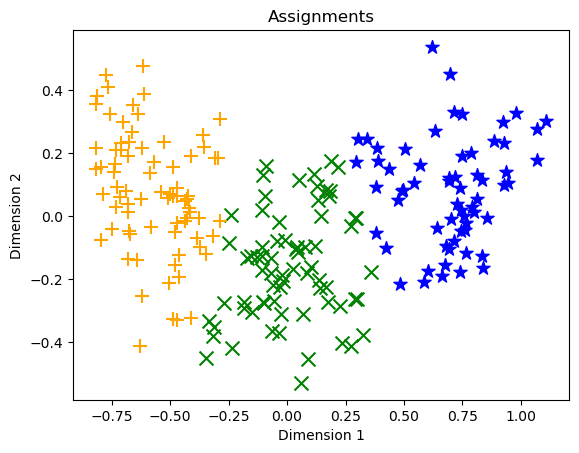

In [29]:
# 3 clusters identified by the model by changing the colors & signs of clusters that I have got

plot_clusters(features_2d, km_clusters)

We can observe that data has been seperated into 3 clusters.


In [30]:
# Evaluating the performance by checking with the actual target data

In [31]:
data.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [32]:
data['species'].value_counts()

species
0    70
1    70
2    70
Name: count, dtype: int64

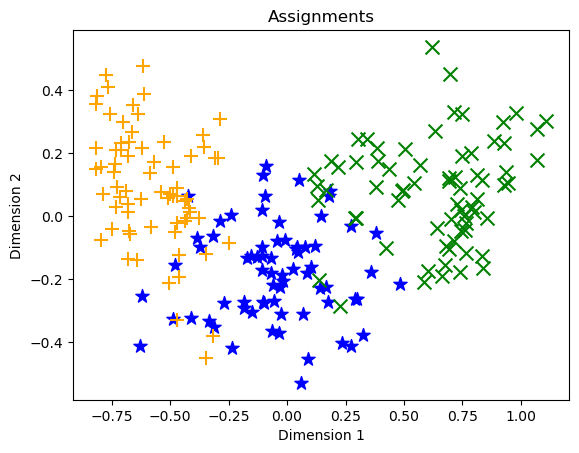

In [33]:
seed_species = data[data.columns[7]]
plot_clusters(features_2d, seed_species.values)


When we compare actual target column with predicted target column, we can see that at some boundary cases there are few misclassifications but however this model does work pretty well (we can see remaining datapoints are performing significantly well, we r eventually getting a good chunk of cluster).

